In [3]:
from scipy.fft import fft
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [4]:
def dft(filename, mode, blades):
    
    data1 = AudioSegment.from_file(filename)
    data = data1.set_channels(1).get_array_of_samples()
    # fs = data1.frame_rate / len(data)
    # k = np.arange(1, int(len(data) / 2) - 1, fs)

    N = len(data)
    n = np.arange(0, N)
    # k = np.arange(1, data1.frame_rate / 2, data1.frame_rate / len(data))

    print(len(k))
    k = np.linspace(1, 1000, 1000)
    # k = n.reshape((N, 1))

    # n = np.arange(N)
    # T = N / data1.frame_rate
    # k = n / T
    # k = np.linspace(1, 1000)
    X = np.zeros(len(k))

    # print(len(k))

    for i in range (0, len(k)):

        # print(i)

        # if mode == "real":
        #     base_sinusoid = np.cos(2 * np.pi * k[i] * n / N)
        #     title_append = " z realnimi sinusoidami"
        if mode == "complex":
            base_sinusoid = np.exp(-2j * np.pi * k[i] * n / N)
            title_append = " s kompleksnimi sinusoidami"

        dot_product = np.dot(data, base_sinusoid)
    
        X[i] = np.abs(dot_product)

    # n_oneside = N // 2
    # k = k[:n_oneside]
    
    # X = X[:n_oneside]/n_oneside
    
    energy_sum = 0
    for i in range(0, len(X)):
        energy_sum += X[i] ** 2

    present_frequencies = []
    for i in range(0, len(X)):
        if (((X[i] ** 2) * 100 / energy_sum) >= 1):
            present_frequencies.append(k[i])

    print("The following frequencies are present: ", present_frequencies)
        
    plt.figure(1)
    
    plt.title("Frequency analysis") 
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    
    plt.plot(k, X)
    
    plt.show()

    print("RPM: ", present_frequencies[0] * 60 / blades)

In [5]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_a_1.m4a", "complex", 10)

UnboundLocalError: local variable 'k' referenced before assignment

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_b_1.m4a", "complex", 5)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_1.m4a", "complex", 3)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_2.m4a", "complex", 3)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_3.m4a", "complex", 3)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_4.m4a", "complex", 3)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_5.m4a", "complex", 3)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_6.m4a", "complex", 3)

In [ ]:
dft("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_c_7.m4a", "complex", 3)

The following frequencies are present:  [199.37564366632338, 199.47219361483008, 199.56874356333677, 199.61701853759013, 199.71356848609682, 199.8101184346035, 199.85839340885684, 200.05149330587025, 200.09976828012358, 200.14804325437694, 200.43769309989702, 399.5719618949537]


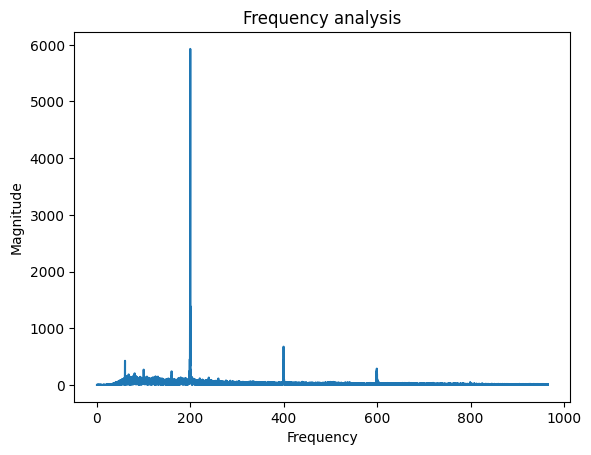

In [3]:
data1 = AudioSegment.from_file("C:/Users/Viktorija/Desktop/ROSIS/N3/rpm/sig_b_1.m4a")
data = data1.set_channels(1).get_array_of_samples()
N = len(data)
n = np.arange(N)
T = N / data1.frame_rate
freq = n / T
# print(freq)

X = fft(data)
# xf = fftfreq(N, T)[:N//2]

plt.figure(1)

plt.title("Frequency analysis")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

n_oneside = N // 2
freq = freq[:n_oneside]

X = X[:n_oneside]/n_oneside

energy_sum = 0
for i in range(0, len(X)):
    energy_sum += X[i] ** 2

present_frequencies = []
for i in range(0, len(X)):
    if (((X[i] ** 2) * 100 / energy_sum) >= 1):
        present_frequencies.append(freq[i])

print("The following frequencies are present: ", present_frequencies)

# X = X[:len(X) / 2]
# time = np.linspace(0, )

# plt.plot(np.linspace(0, 1000, num=int(len(data) / 2)), abs(X[:int(len(data)/2)]))

plt.plot(freq[:20000], abs(X)[:20000])

plt.show()